In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# Load dataset
dataset = pd.read_csv("academic_success_dataset.csv")

print("Initial shape:", dataset.shape)
print("Initial columns:", dataset.columns.tolist())

Initial shape: (4424, 27)
Initial columns: ['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target', 'Unnamed: 25', 'Unnamed: 26']


In [ ]:
dataset.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target,Unnamed: 25,Unnamed: 26
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,1.0,0.0,NaN,0.0,10.8,1.4,1.74,Dropout,NaN,NaN
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,1.0,0.0,19.0,0.0,13.9,-0.3,0.79,Graduate,NaN,NaN
2,1.0,NaN,5.0,9070.0,1.0,1.0,122.0,NaN,37.0,37.0,...,1.0,NaN,19.0,0.0,10.8,1.4,1.74,Dropout,NaN,NaN
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,NaN,0.0,20.0,0.0,9.4,-0.8,-3.12,Graduate,NaN,NaN
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,NaN,...,0.0,0.0,NaN,0.0,13.9,-0.3,0.79,Graduate,NaN,NaN
5,2.0,39.0,1.0,9991.0,0.0,19.0,133.1,1.0,37.0,37.0,...,1.0,0.0,50.0,NaN,16.2,0.3,-0.92,Graduate,NaN,NaN
6,1.0,1.0,NaN,9500.0,1.0,1.0,142.0,1.0,19.0,38.0,...,0.0,NaN,18.0,0.0,15.5,2.8,-4.06,Graduate,NaN,NaN
7,1.0,NaN,4.0,9254.0,1.0,1.0,119.0,1.0,37.0,37.0,...,1.0,0.0,22.0,NaN,15.5,2.8,-4.06,Dropout,NaN,NaN
8,NaN,1.0,3.0,9238.0,NaN,1.0,137.0,62.0,1.0,1.0,...,0.0,1.0,21.0,1.0,16.2,0.3,-0.92,NaN,NaN,NaN
9,1.0,1.0,1.0,9238.0,1.0,NaN,138.0,1.0,1.0,19.0,...,0.0,0.0,18.0,0.0,8.9,NaN,3.51,Dropout,NaN,NaN


In [ ]:
##Selecting numerical features
numerical_data = dataset.select_dtypes(include='number')

#append the features of numerical_data to list
numerical_features=numerical_data.columns.tolist()

print(f'There are {len(numerical_features)} numerical features:', '\n')
print(numerical_features)

There are 26 numerical features: 

['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Unemployment rate', 'Inflation rate', 'GDP', 'Unnamed: 25', 'Unnamed: 26']


In [ ]:
#Selecting categoricalfeatures
categorical_data=dataset.select_dtypes(include= 'object')

#append the features of categorical_data to list
categorical_features=categorical_data.columns.tolist()

print(f'There are {len(categorical_features)} numerical features:', '\n')
print(categorical_features)

There are 1 numerical features: 

['Target']


<ipython-input-25-38ddaa92aade>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Target", data=dataset, palette="viridis")


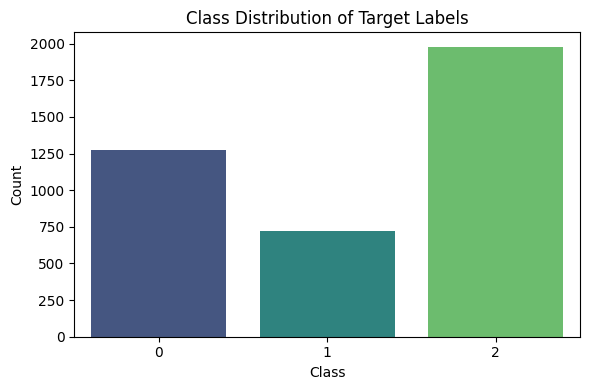

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Target", data=dataset, palette="viridis")
plt.title("Class Distribution of Target Labels")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

In [ ]:
# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()
correlation_matrix

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Unnamed: 25,Unnamed: 26
Marital status,1.000000,0.272283,-0.133386,0.049238,-0.249639,0.064128,-0.012464,-0.000230,0.193717,0.128422,...,-0.085866,-0.019408,-0.058398,0.519273,-0.024565,-0.026655,0.010249,-0.031970,NaN,NaN
Application mode,0.272283,1.000000,-0.279194,0.091408,-0.309777,0.423982,-0.035747,0.004130,0.114221,0.090591,...,-0.128040,0.150161,-0.168193,0.512439,0.007425,0.096780,-0.014802,-0.035146,NaN,NaN
Application order,-0.133386,-0.279194,1.000000,0.065233,0.158088,-0.184700,-0.063000,-0.017055,-0.063865,-0.045390,...,0.056827,-0.085652,0.082979,-0.268781,-0.029537,-0.098969,-0.013552,0.036821,NaN,NaN
Course,0.049238,0.091408,0.065233,1.000000,-0.043596,0.006595,-0.082613,-0.014590,0.060951,0.053140,...,0.021956,-0.093058,0.026010,0.043035,-0.033084,0.004079,0.022479,-0.014133,NaN,NaN
Daytime/evening attendance\t,-0.249639,-0.309777,0.158088,-0.043596,1.000000,-0.076964,0.037828,0.017786,-0.194607,-0.136796,...,0.035782,-0.010374,0.100069,-0.461294,0.028053,0.059635,-0.030558,0.032829,NaN,NaN
Previous qualification,0.064128,0.423982,-0.184700,0.006595,-0.076964,1.000000,0.111794,-0.025856,-0.017178,0.001447,...,-0.066140,0.080861,-0.066096,0.153007,-0.029875,0.117137,-0.053671,0.060448,NaN,NaN
Previous qualification (grade),-0.012464,-0.035747,-0.063000,-0.082613,0.037828,0.111794,1.000000,0.067662,-0.041136,-0.030404,...,0.069195,-0.047786,0.059792,-0.111009,0.056961,0.048658,0.026294,-0.053057,NaN,NaN
Nacionality,-0.000230,0.004130,-0.017055,-0.014590,0.017786,-0.025856,0.067662,1.000000,-0.059092,-0.084323,...,-0.021690,-0.026413,-0.017508,-0.009084,0.789915,0.004351,-0.016999,0.033080,NaN,NaN
Mother's qualification,0.193717,0.114221,-0.063865,0.060951,-0.194607,-0.017178,-0.041136,-0.059092,1.000000,0.539903,...,-0.014264,-0.058302,0.034311,0.292361,-0.037642,-0.110894,0.048168,-0.082145,NaN,NaN
Father's qualification,0.128422,0.090591,-0.045390,0.053140,-0.136796,0.001447,-0.030404,-0.084323,0.539903,1.000000,...,-0.010726,-0.080016,0.120818,0.195806,-0.078074,-0.080264,0.049515,-0.076036,NaN,NaN


/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


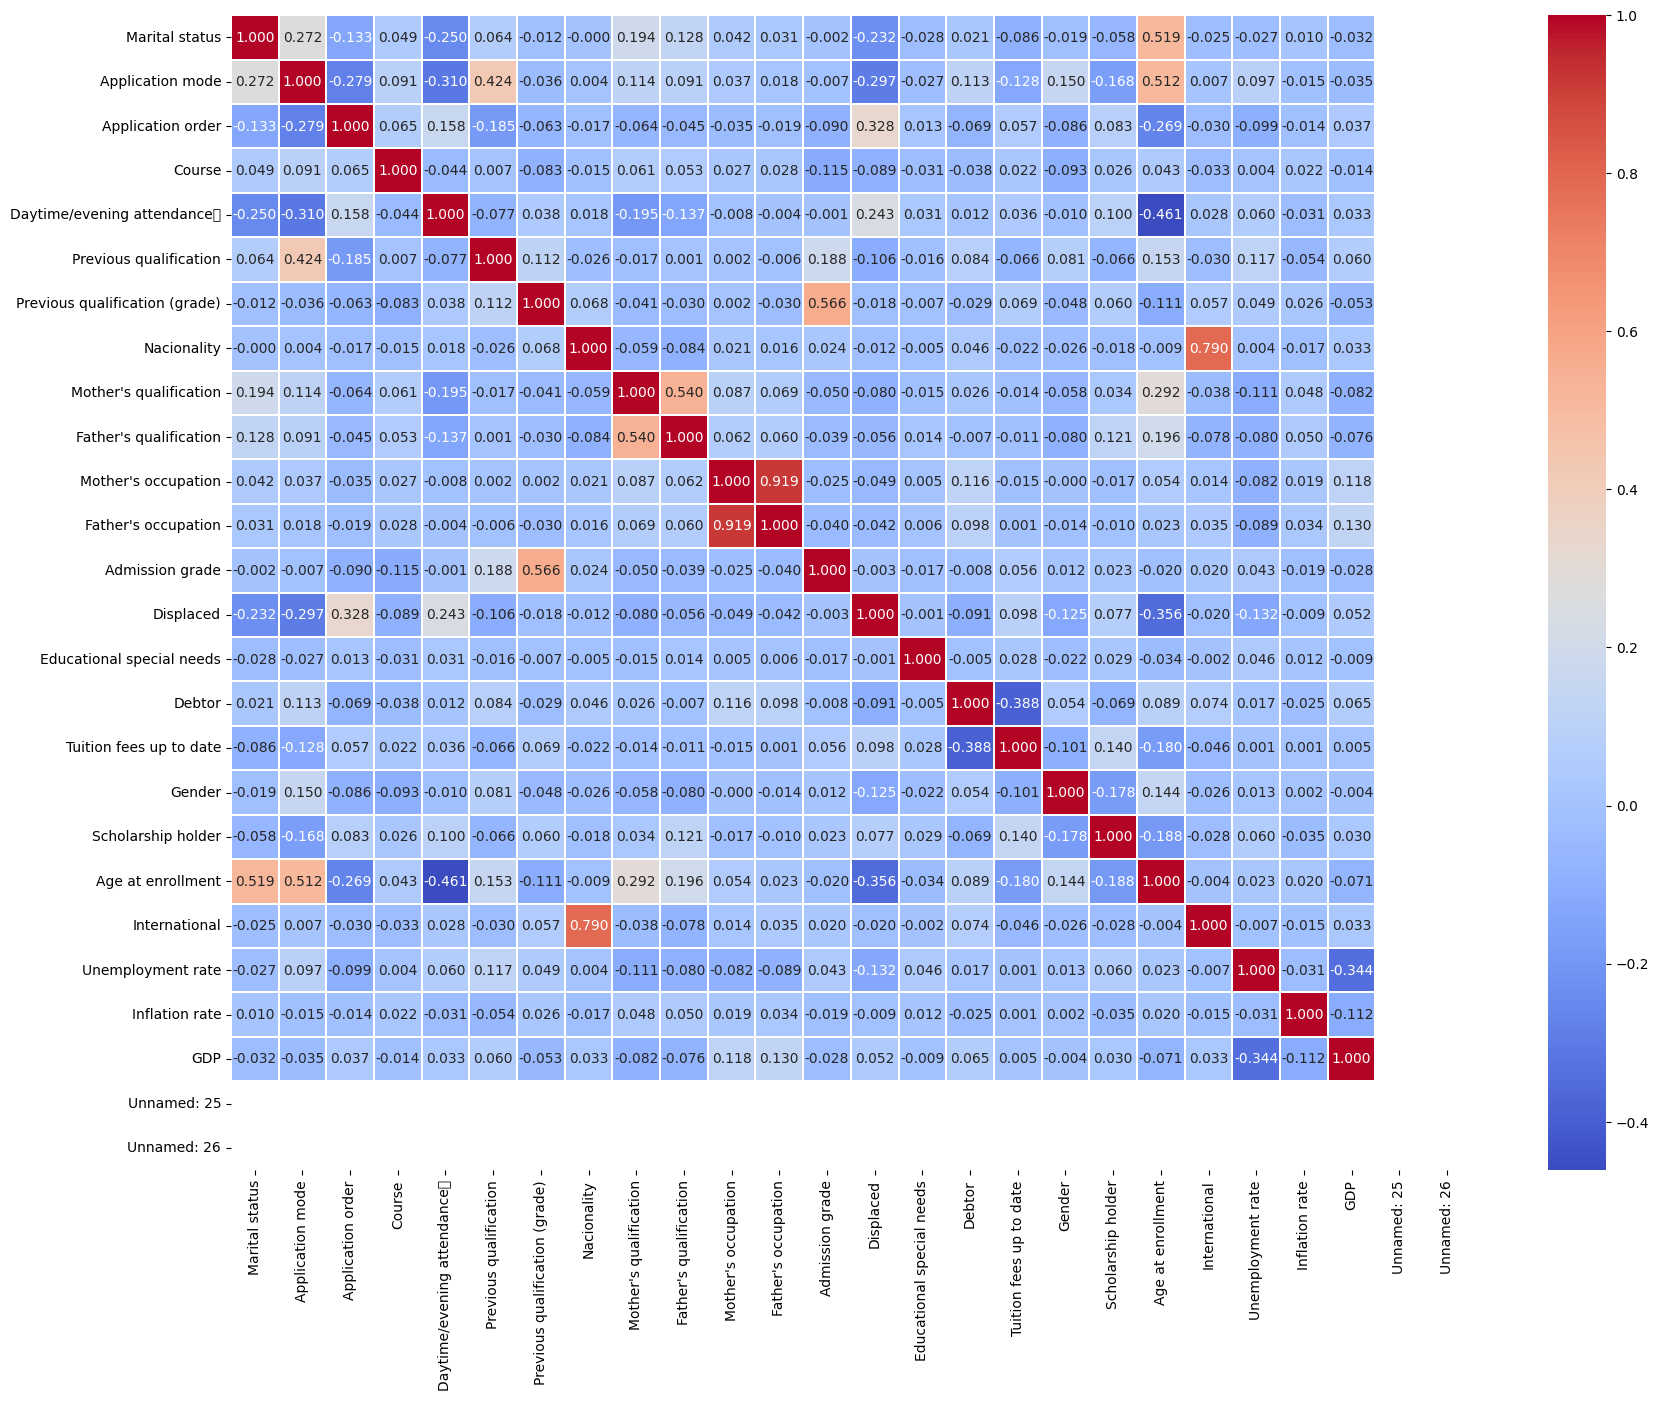

In [ ]:
# Plotting the heatmap for correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

In [ ]:
# Drop empty columns
dataset = dataset.drop(columns=["Unnamed: 25", "Unnamed: 26"], errors='ignore')
print("Shape after dropping:", dataset.shape)

Shape after dropping: (4424, 25)


In [ ]:
# Show missing values before imputation

print(dataset.isnull().sum()[dataset.isnull().sum() > 0])

Marital status                    423
Application mode                  483
Application order                 426
Course                            465
Daytime/evening attendance\t      440
Previous qualification            434
Previous qualification (grade)    472
Nacionality                       446
Mother's qualification            414
Father's qualification            450
Mother's occupation               436
Father's occupation               425
Admission grade                   462
Displaced                         442
Educational special needs         448
Debtor                            452
Tuition fees up to date           426
Gender                            437
Scholarship holder                450
Age at enrollment                 444
International                     428
Unemployment rate                 429
Inflation rate                    422
GDP                               456
Target                            453
dtype: int64


In [ ]:
# Safely remove rows with no label
dataset = dataset.dropna(subset=["Target"])
print(dataset.isnull().sum()[dataset.isnull().sum() > 0])

Marital status                    367
Application mode                  420
Application order                 383
Course                            430
Daytime/evening attendance\t      396
Previous qualification            386
Previous qualification (grade)    423
Nacionality                       407
Mother's qualification            373
Father's qualification            397
Mother's occupation               393
Father's occupation               389
Admission grade                   422
Displaced                         398
Educational special needs         400
Debtor                            410
Tuition fees up to date           387
Gender                            385
Scholarship holder                404
Age at enrollment                 398
International                     387
Unemployment rate                 384
Inflation rate                    372
GDP                               406
dtype: int64


In [ ]:
# Handle missing values
# Fill numeric columns with median
for col in dataset.select_dtypes(include=['float64', 'int64']).columns:
    dataset[col] = dataset[col].fillna(dataset[col].median())

# Fill non-numeric columns (like object/category) with mode
for col in dataset.select_dtypes(exclude=['float64', 'int64']).columns:
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

# Show missing values after imputation

print(dataset.isnull().sum().sum(), "missing values remaining.")


0 missing values remaining.


In [ ]:
# Ensure the 'Target' column is categorized properly
dataset["Target"] = dataset["Target"].astype("category")

# Create the mapping dictionary from the categories
target_mapping = dict(enumerate(dataset["Target"].cat.categories))

# Encode the target column as integers
dataset["Target"] = dataset["Target"].cat.codes

# Print the encoded target variable and corrected mapping

print("Target Mapping:", target_mapping)
print("Target Value Counts:\n", dataset["Target"].value_counts())


Target Mapping: {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
Target Value Counts:
 Target
2    1979
0    1273
1     719
Name: count, dtype: int64


In [ ]:
# Separate features and target
X = dataset.drop(columns=["Target"])
y = dataset["Target"]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)

Feature shape: (3971, 24)
Target shape: (3971,)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Example (first row of scaled features):\n", X_scaled[0])

Example (first row of scaled features):
 [-0.28241266 -0.08237831  2.63388114 -4.50235212  0.32860297 -0.33043918
 -0.85199698 -0.11562421 -0.03387151 -0.67815934 -0.21092167 -0.06341611
  0.0376502   0.82061513 -0.10462814 -0.33977851  0.34482856  1.466829
 -0.54057616 -0.40024889 -0.15570983 -0.28602783  0.1191201   0.77685556]


In [ ]:
# Split the dataset (Stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 2779
Test size: 1192


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

knn = KNeighborsClassifier(n_neighbors=5)
dt = DecisionTreeClassifier(random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42)

# Train classifiers
knn.fit(X_train, y_train)
dt.fit(X_train, y_train)
mlp.fit(X_train, y_train)


# Predict
y_pred_knn = knn.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_mlp = mlp.predict(X_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, confusion_matrix,
    classification_report, roc_auc_score, roc_curve, auc
)

# Evaluate models
def evaluate(y_true, y_pred, model_name):
    print(f"\n📊 {model_name}")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='weighted', zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, average='weighted'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))

evaluate(y_test, y_pred_knn, "KNN")
evaluate(y_test, y_pred_dt, "Decision Tree")
evaluate(y_test, y_pred_mlp, "Neural Network")


📊 KNN
Accuracy: 0.5604026845637584
Precision: 0.5428927726946581
Recall: 0.5604026845637584
Confusion Matrix:
 [[212  47 123]
 [ 70  42 104]
 [111  69 414]]
Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.55      0.55       382
           1       0.27      0.19      0.22       216
           2       0.65      0.70      0.67       594

    accuracy                           0.56      1192
   macro avg       0.48      0.48      0.48      1192
weighted avg       0.54      0.56      0.55      1192


📊 Decision Tree
Accuracy: 0.5218120805369127
Precision: 0.5156761575552756
Recall: 0.5218120805369127
Confusion Matrix:
 [[187  60 135]
 [ 63  49 104]
 [116  92 386]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.49      0.50       382
           1       0.24      0.23      0.24       216
           2       0.62      0.65      0.63       594

    accuracy               

In [ ]:
# Store scores
model_names = ["KNN", "Decision Tree", "Neural Network"]
y_preds = [y_pred_knn, y_pred_dt, y_pred_mlp]
probas = [knn.predict_proba(X_test), dt.predict_proba(X_test), mlp.predict_proba(X_test)]

accuracies = [accuracy_score(y_test, pred) for pred in y_preds]
precisions = [precision_score(y_test, pred, average='weighted', zero_division=0) for pred in y_preds]
recalls = [recall_score(y_test, pred, average='weighted') for pred in y_preds]


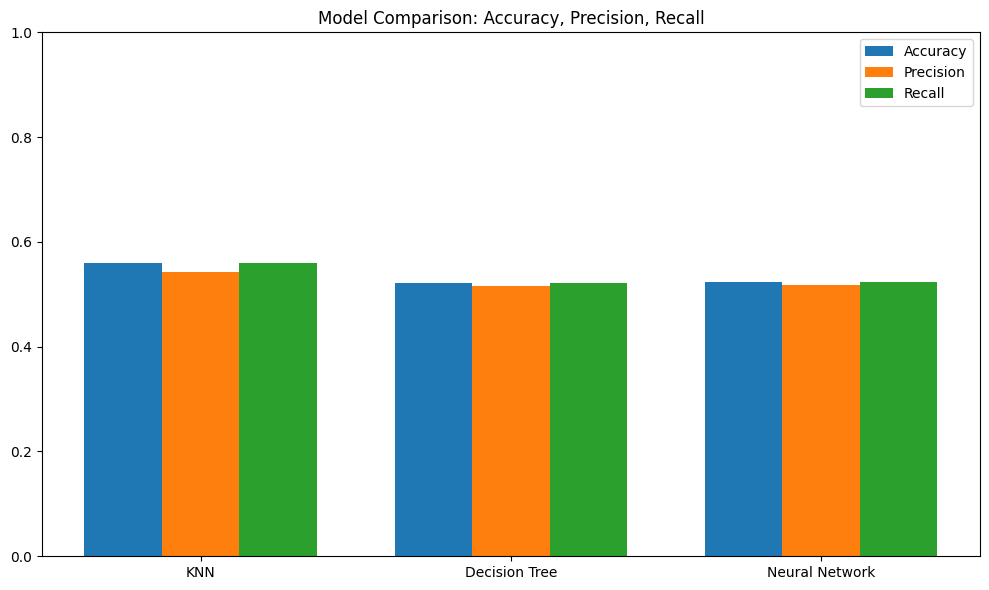

In [ ]:
# 🔹 Bar chart: Accuracy, Precision, Recall
x = np.arange(len(model_names))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, accuracies, width, label='Accuracy')
plt.bar(x, precisions, width, label='Precision')
plt.bar(x + width, recalls, width, label='Recall')
plt.xticks(x, model_names)
plt.ylim(0, 1)
plt.title("Model Comparison: Accuracy, Precision, Recall")
plt.legend()
plt.tight_layout()
plt.show()

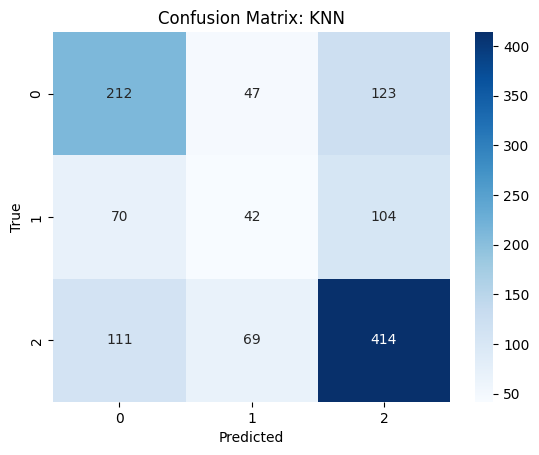

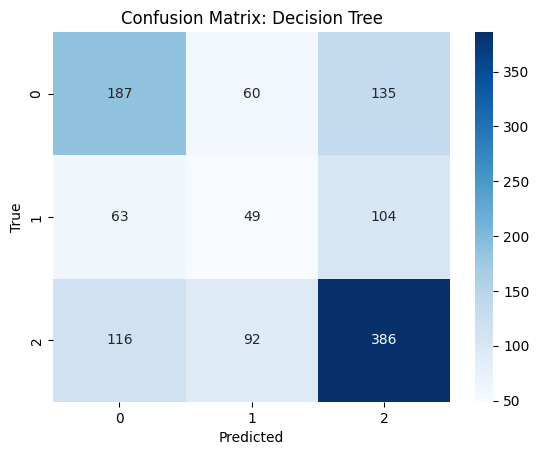

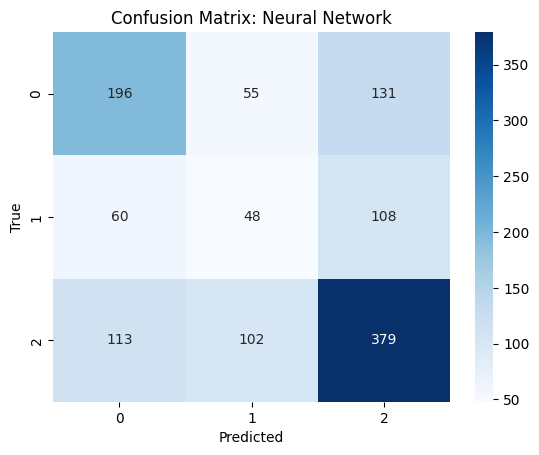

In [ ]:
# 🔹 Confusion Matrices
for model_name, y_pred in zip(model_names, y_preds):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

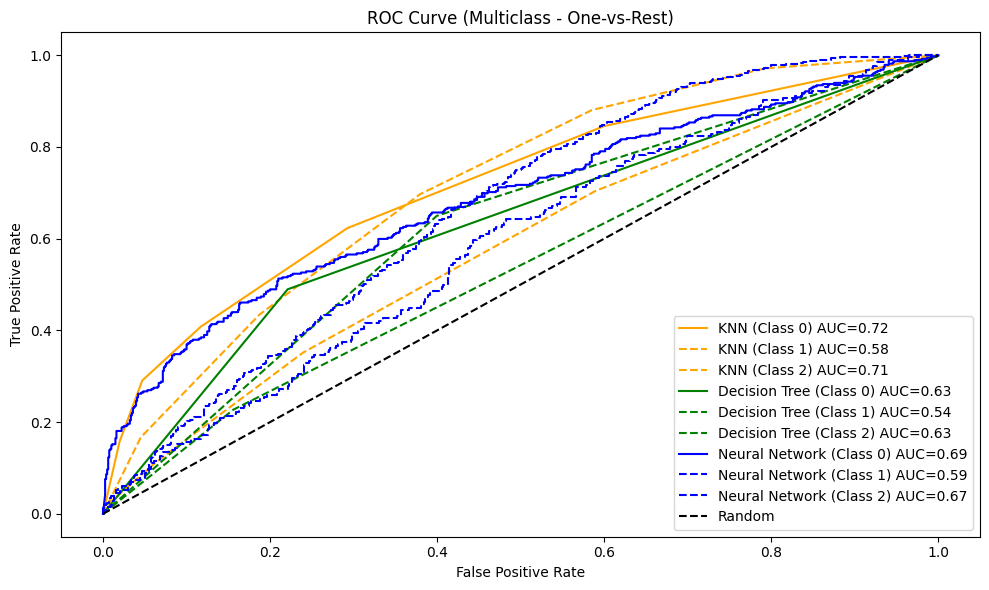

In [ ]:
# 🔹 ROC Curve & AUC for Multiclass
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10, 6))
colors = ['orange', 'green', 'blue']
for i, (proba, name) in enumerate(zip(probas, model_names)):
    fpr = dict()
    tpr = dict()
    for j in range(n_classes):
        fpr[j], tpr[j], _ = roc_curve(y_test_bin[:, j], proba[:, j])
        roc_auc = auc(fpr[j], tpr[j])
        plt.plot(fpr[j], tpr[j], label=f"{name} (Class {j}) AUC={roc_auc:.2f}", linestyle='--' if j > 0 else '-', color=colors[i])

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.title("ROC Curve (Multiclass - One-vs-Rest)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.tight_layout()
plt.show()